## Import Data and Libraries

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

df = pd.read_csv('alcohol-consumption-in-russia.csv')
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


## Data Exploration

In [343]:
df.region = df.region.astype('category')
df.region.describe()

count           1615
unique            85
top       Altai Krai
freq              19
Name: region, dtype: object

In [344]:
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       1615 non-null   int64   
 1   region     1615 non-null   category
 2   wine       1552 non-null   float64 
 3   beer       1557 non-null   float64 
 4   vodka      1554 non-null   float64 
 5   champagne  1552 non-null   float64 
 6   brandy     1549 non-null   float64 
dtypes: category(1), float64(5), int64(1)
memory usage: 80.1 KB


In [346]:
def nans(col):
    return col.isna().sum()

# Count the number of missing values for different columns in each region
nan_series = df.groupby('region').agg(nans).sum(axis=1).nlargest(10)
nan_regions = nan_series.index[0:4]
df = df[~df.region.isin(nan_regions)]
nan_series 

region
Chechen Republic          92.0
Republic of Crimea        80.0
Sevastopol                80.0
Republic of Ingushetia    59.0
Altai Krai                 0.0
Altai Republic             0.0
Amur Oblast                0.0
Arkhangelsk Oblast         0.0
Astrakhan Oblast           0.0
Belgorod Oblast            0.0
dtype: float64

In [347]:
df.describe().round(2)

,year,wine,beer,vodka,champagne,brandy
count,1539.00,1539.00,1539.00,1539.00,1539.00,1539.00
mean,2007.00,5.64,51.72,11.90,1.32,0.52
std,5.48,2.81,25.12,5.08,0.80,0.40
min,1998.00,0.10,1.00,0.40,0.10,0.00
25%,2002.00,3.55,32.70,8.40,0.80,0.20
50%,2007.00,5.40,50.30,11.60,1.20,0.40
75%,2012.00,7.40,67.50,15.00,1.66,0.70
max,2016.00,18.10,207.30,40.60,5.56,2.30


In [348]:
'''df.sort_values(['region','year'],inplace=True)
df.set_index(['region','year'],inplace=True)
df.fillna(method='bfill',inplace=True)
df.reset_index(inplace=True)'''

"df.sort_values(['region','year'],inplace=True)\ndf.set_index(['region','year'],inplace=True)\ndf.fillna(method='bfill',inplace=True)\ndf.reset_index(inplace=True)"

In [349]:
# Variance with respect to year for differnt regions
df.groupby('region').var().mean().round(2)

year          31.67
wine           4.57
beer         412.07
vodka         13.43
champagne      0.29
brandy         0.09
dtype: float64

In [350]:
saint_peter = df[df.region=='Saint Petersburg'].copy(deep=True)
saint_peter.drop(['region'],axis=1,inplace=True)
saint_peter.head(3)

,year,wine,beer,vodka,champagne,brandy
59,1998,2.7,27.9,12.3,1.2,0.5
144,1999,2.6,57.4,13.0,1.7,0.6
229,2000,4.4,68.2,14.7,2.0,0.9


## Data Visualization

<ipython-input-351-ee1220b60717>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(ax5.get_xticks(), rotation=45)


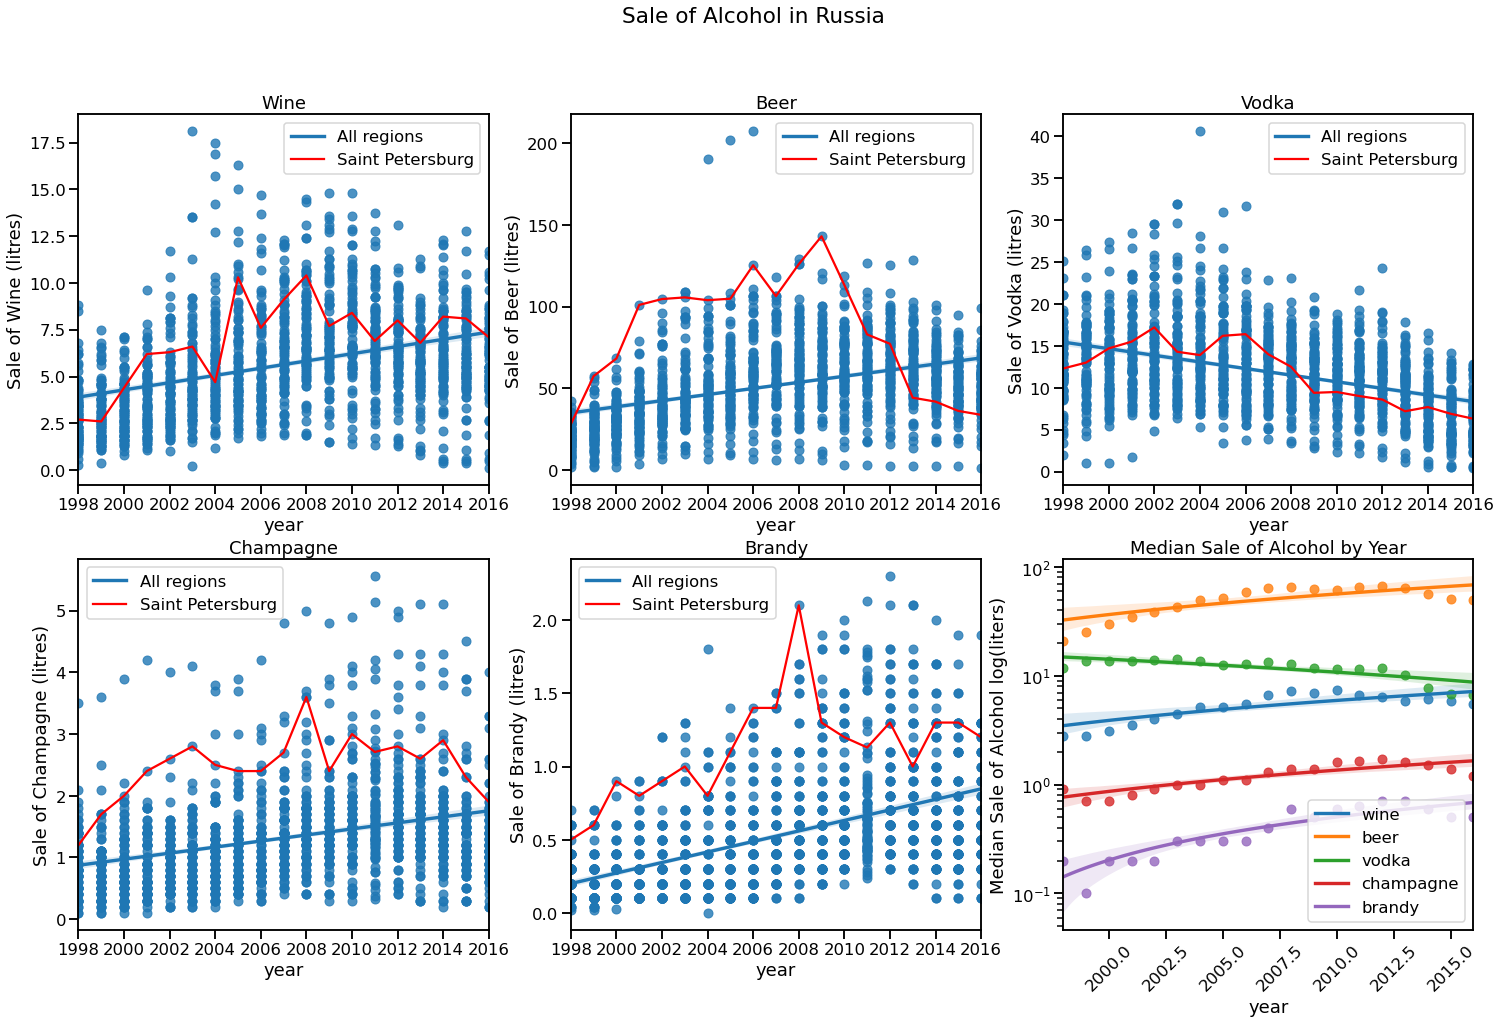

In [351]:
sns.set_context('talk')

alcohols = df.columns[2:].to_list()

fig, ax = plt.subplots(2,3,figsize=(25, 15))
ax_list = ax.flatten()

from matplotlib.ticker import MaxNLocator

for i,axis in enumerate(ax_list):
    if i==5:
        break
    
    sns.regplot(x='year',y=alcohols[i],data=df,ax=axis)
    sns.lineplot(x='year',y=alcohols[i],data=saint_peter,ax=axis,color='red',ci=None)
    axis.set_title(alcohols[i].capitalize())
    axis.xaxis.set_major_locator(MaxNLocator(integer=True))
    axis.set_ylabel(f'Sale of {alcohols[i].capitalize()} (litres)')
    axis.legend(['All regions','Saint Petersburg'])

grouped_by_year = df.groupby('year').median() # Use median to avoid outliers
ax5 = ax_list[-1]
for alcohol in alcohols:
    sns.regplot(x=grouped_by_year.index, y=alcohol, data=grouped_by_year, ax=ax5)

# Set the y-axis as log scale
ax5.set_yscale('log')           # Log Scale because different alcohols are consumed at different rates
# Rotate the x-axis labels
ax5.set_xticklabels(ax5.get_xticks(), rotation=45) 
# Set the y-label  
ax5.set_ylabel('Median Sale of Alcohol log(liters)')
# Set title for ax5
ax5.set_title('Median Sale of Alcohol by Year')
# Set the legend
ax5.legend(alcohols, loc='lower right')


# Set title the whole figure
fig.suptitle('Sale of Alcohol in Russia') 
# Save figure
fig.savefig("Sale of Alcohol in Russia.png", dpi=300)

## Correlation with Saint Petersburg

In [352]:
regions_df = df.pivot_table(index='year',columns='region',values=alcohols)
regions_df

beer                                                \
region Altai Krai Altai Republic Amur Oblast Arkhangelsk Oblast   
year                                                              
1998        19.20           7.60       21.20               10.6   
1999        24.70           5.10       26.70               17.4   
2000        33.20          12.10       28.50               29.3   
2001        39.50          18.70       31.20               47.6   
2002        42.80          30.90       35.40               76.1   
2003        47.70          25.90       40.40              109.0   
2004        52.40          25.40       44.80               51.8   
2005        58.60          27.10       48.60               45.6   
2006        50.20          32.40       54.80               43.1   
2007        52.80          39.40       64.60               40.3   
2008        53.40          46.70       71.10               38.9   
2009        51.60          60.70       75.30               38.7   
2010        59.00          59.90       75.80               40.2   
2011        63.39          61.96       83.27               41.6   
2012        70.40          62.90       75.80               49.2   
2013        64.60          59.50       75.10               49.2   
2014        52.50          39.00       64.00               64.4   
2015        45.80          40.30       50.70               49.1   
2016        37.30          42.20       46.90               51.6   

                                                                           \
region Astrakhan Oblast Belgorod Oblast Bryansk Oblast Chelyabinsk Oblast   
year                                                                        
1998              18.00           23.00          32.40               27.9   
1999              18.60           22.30          34.80               32.5   
2000              31.00           20.70          36.40               46.3   
2001              42.60           23.20          41.60               45.2   
2002              44.00           23.20          38.90               55.7   
2003              48.30           25.80          33.90               65.1   
2004              58.00           35.10          32.50               81.0   
2005              61.90           43.60          33.60               90.9   
2006              59.80           46.50          46.30              103.9   
2007              64.00           55.60          60.40              118.3   
2008              67.50           57.90          56.70              129.4   
2009              74.00           44.90          55.00              120.8   
2010              77.10           35.60          53.20              108.9   
2011              77.01           35.87          49.13               85.8   
2012              79.70           39.50          50.90               77.2   
2013              79.10           45.70          42.40               79.8   
2014              62.90           55.50          46.90               53.9   
2015              37.40           53.40          39.50               43.6   
2016              38.30           53.40          35.00               42.6   

                                                   ...          wine  \
region Chukotka Autonomous Okrug Chuvash Republic  ... Tyumen Oblast   
year                                               ...                 
1998                        1.80            20.90  ...           3.0   
1999                        2.30            25.50  ...           4.1   
2000                        5.20            29.80  ...           4.6   
2001                       11.00            32.20  ...           5.2   
2002                        6.40            31.70  ...           5.8   
2003                       12.30            33.80  ...           5.0   
2004                       10.80            39.70  ...           4.9   
2005                        9.10            37.60  ...           4.2   
2006                       11.00            46.00  

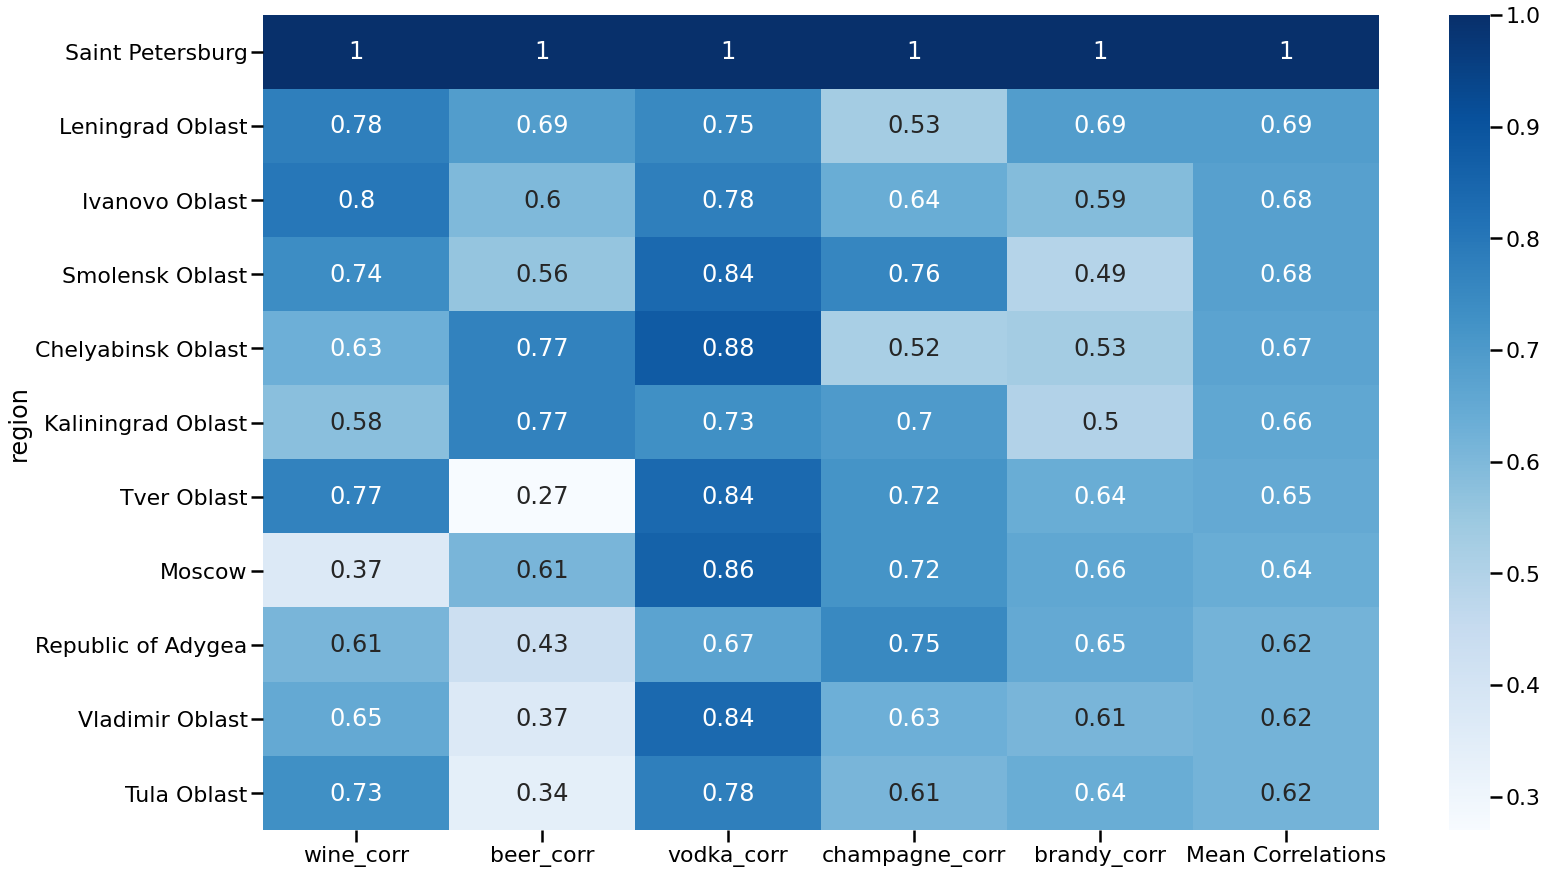

In [353]:
corr_list = []
for alcohol in alcohols:
    alcohol_df = regions_df[alcohol].corr()['Saint Petersburg'].sort_values(ascending=False)
    corr_list.append(alcohol_df)

corr_df = pd.concat(corr_list,axis=1)
corr_df.columns = [i+'_corr' for i in alcohols]
corr_df['Mean Correlations'] = corr_df.sum(axis=1)/5
corr_df.sort_values('Mean Correlations',ascending=False,inplace=True)

sns.set_context('poster')
fig = plt.figure(figsize=(25,15))
sns.heatmap(corr_df[0:11].round(2),cmap='Blues',annot=True)
plt.xticks(rotation=0)
#ax.set_title('Correlations of Different Regions with Saint Petersburg for Different Alcohols')
fig.savefig("Correlations with Saint Petersburg.png", dpi=300)

In [354]:
corr_df.drop('Mean Correlations',axis=1,inplace=True)
corr_df.columns = pd.MultiIndex.from_product([['Correlations'],alcohols])

## Normalize Data

In [355]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler

#for alcohol in alcohols:
#    df[alcohol] = scaler.fit_transform(df[alcohol].values.reshape(-1,1))

cluster_df = df.pivot_table(index='region',columns='year',values=alcohols)

# Scale the data
cluster_df = pd.DataFrame(scaler.fit_transform(cluster_df),index=cluster_df.index,columns=cluster_df.columns)

# Multiply Correlation by 10 so that it has a stronger impact on the clustering 
#corr_df *= 10

# Merge the Correlation and the DataFrame
cluster_df = cluster_df.merge(corr_df,left_index=True,right_index=True,how='inner')
cluster_df.fillna(0,inplace=True)

cluster_df.describe()

beer                                                         \
year        1998       1999       2000       2001       2002       2003   
count  81.000000  81.000000  81.000000  81.000000  81.000000  81.000000   
mean    0.462029   0.426435   0.426670   0.341610   0.370584   0.384183   
std     0.211328   0.205303   0.180142   0.165270   0.205095   0.228721   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.322581   0.304659   0.311747   0.237462   0.234216   0.242699   
50%     0.468983   0.422939   0.424699   0.321392   0.322811   0.328298   
75%     0.590571   0.519713   0.528614   0.422723   0.450102   0.475327   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

                                                   ...       wine             \
year        2004       2005       2006       2007  ...       2012       2013   
count  81.000000  81.000000  81.000000  81.000000  ...  81.000000  81.000000   
mean    0.252697   0.238655   0.276373   0.505909  ...   0.446328   0.478542   
std     0.143929   0.140634   0.143344   0.201200  ...   0.192999   0.201139   
min     0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
25%     0.158324   0.150777   0.191118   0.407473  ...   0.330508   0.361905   
50%     0.231774   0.219171   0.255489   0.516904  ...   0.432203   0.476190   
75%     0.333515   0.284974   0.322854   0.597865  ...   0.567797   0.600000   
max     1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   

                                       Correlations                        \
year        2014       2015       2016         wine       beer      vodka   
count  81.000000  81.000000  81.000000    81.000000  81.000000  81.000000   
mean    0.500882   0.458980   0.502980     0.550280   0.306568   0.655764   
std     0.214177   0.191730   0.202013     0.297644   0.310665   0.245240   
min     0.000000   0.000000   0.000000    -0.538082  -0.806176  -0.260487   
25%     0.378151   0.354839   0.387931     0.498478   0.140709   0.558549   
50%     0.478992   0.435484   0.465517     0.634588   0.314869   0.709297   
75%     0.647059   0.588710   0.637931     0.737251   0.557419   0.837992   
max     1.000000   1.000000   1.000000     1.000000   1.000000   1.000000   

                             
year   champagne     brandy  
count  81.000000  81.000000  
mean    0.387822   0.501543  
std     0.275483   0.199641  
min    -0.571230  -0.320481  
25%     0.225752   0.459739  
50%     0.439888   0.531882  
75%     0.550781   0.622553  
max     1.000000   1.000000  

[8 rows x 100 columns]

## K-Means Clustering

<AxesSubplot:>

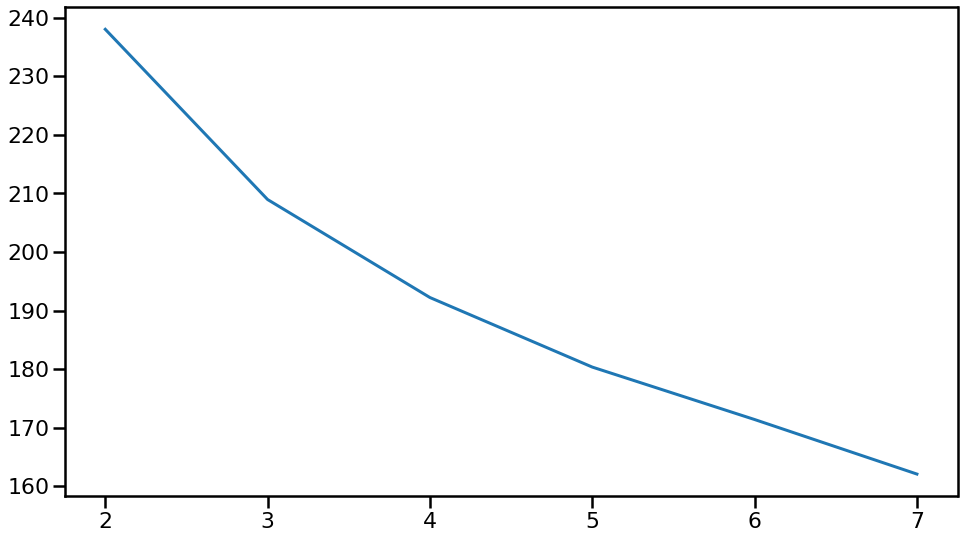

In [356]:
from sklearn.cluster import KMeans

inertia_list = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_df)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(16,9))
sns.lineplot(x=range(2,8),y=inertia_list)

In [357]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(cluster_df)
cluster_df['cluster'] = kmeans.labels_

saint_cluster = cluster_df.loc['Saint Petersburg','cluster'][0]
cluster_df = cluster_df[cluster_df.cluster==saint_cluster]

cluster_df['Mean Correlation'] = cluster_df['Correlations'].mean(axis=1)
cluster_df.sort_values('Mean Correlation',ascending=False,inplace=True)
cluster_df.drop(['cluster','Mean Correlation'],axis=1,inplace=True)
cluster_df.drop('Correlations',axis=1,inplace=True)
cluster_df = cluster_df[:11]
similar_regions = cluster_df.index.to_list()
for region in similar_regions:
    print(region.capitalize())

Saint petersburg
Leningrad oblast
Kaliningrad oblast
Moscow
Tyumen oblast
Khanty–mansi autonomous okrug – yugra
Murmansk oblast
Moscow oblast
Yamalo-nenets autonomous okrug
Sakhalin oblast
Kamchatka krai


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


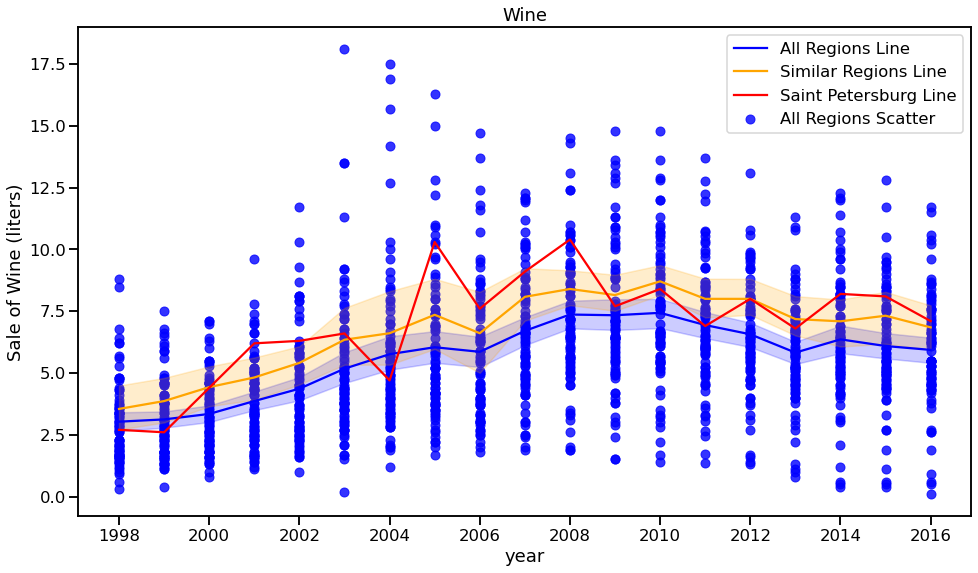

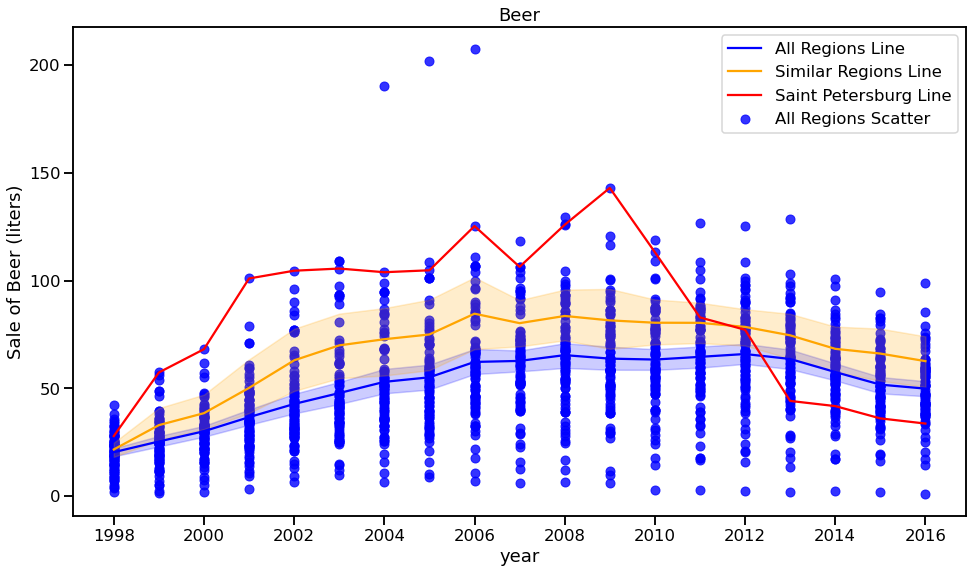

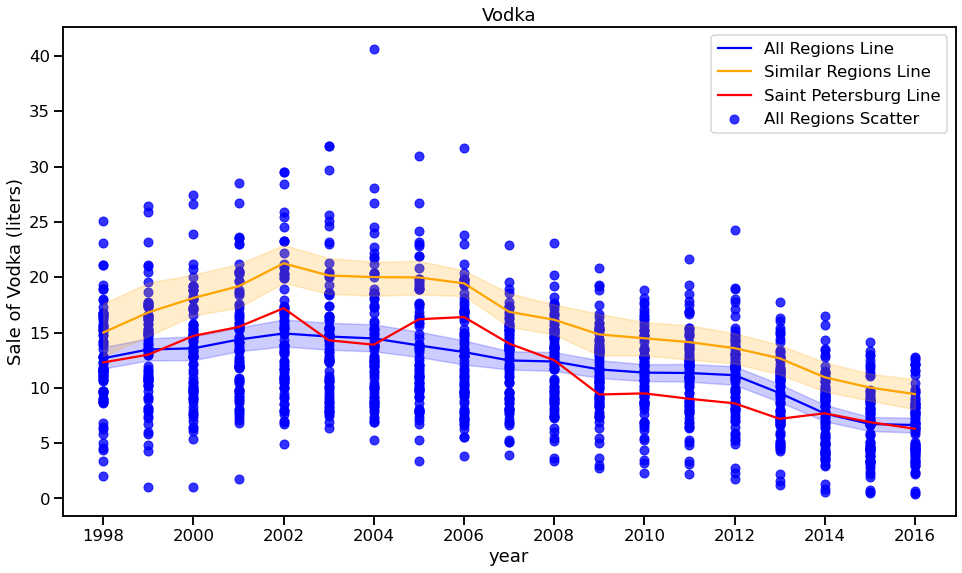

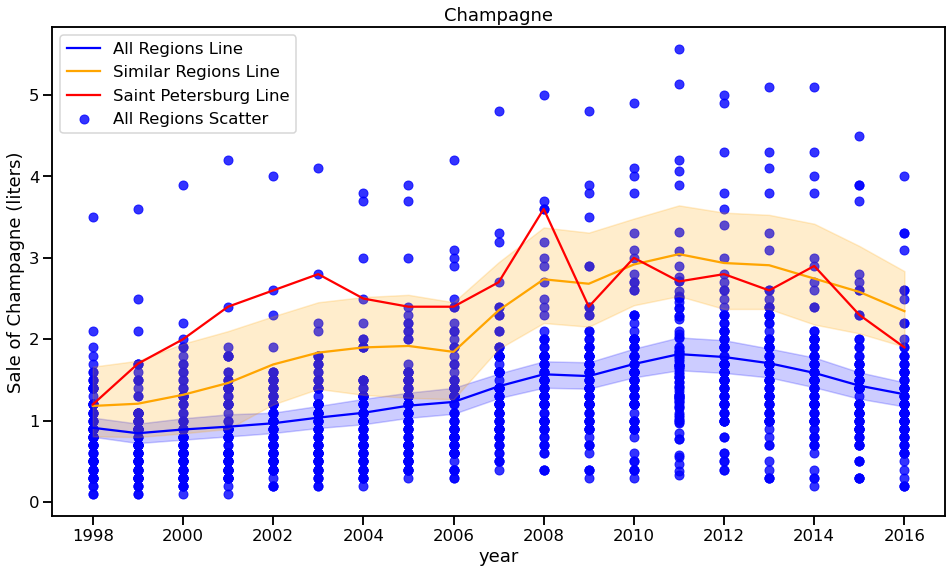

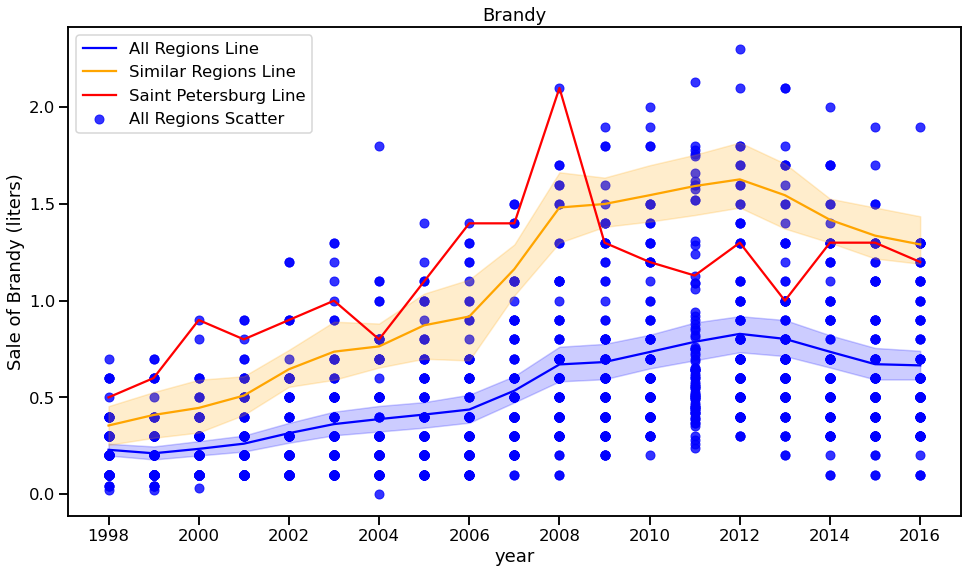

In [359]:
similar_df = df[df.region.isin(similar_regions)]
similar_df.region = similar_df.region.astype('O')

sns.set_context('talk')
for alcohol in alcohols:
    fig = plt.figure(figsize=(16,9))

    # All Regions
    ax = sns.regplot(x='year',y=alcohol,data=df,label='All Regions Scatter',color='blue',fit_reg=False)
    sns.lineplot(x='year',y=alcohol,data=df,label='All Regions Line',color='blue',ax=ax)
    # Similar Regions
    sns.lineplot(x='year',y=alcohol,data=similar_df,label='Similar Regions Line',color='orange',ax=ax)
    # Saint Petersburg
    sns.lineplot(x='year',y=alcohol,data=similar_df[similar_df.region=='Saint Petersburg'],label='Saint Petersburg Line',ci=None,color='red',ax=ax)

    # Make the x-axis integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.title(alcohol.capitalize())
    plt.ylabel(f'Sale of {alcohol.capitalize()} (liters)')
    plt.legend()

    fig.savefig(alcohol.capitalize(),dpi=300)